# Proyecto Teoría de la Información
### EL7024 - Teoría de Información: Fundamentos y Aplicaciones

## Aníbal Fuentes - Mario Vicuña

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn import svm
from time import strftime, localtime, time
from sklearn.ensemble import RandomForestClassifier

## Estimación de distribución de probabilidad de variable discreta

In [2]:
def probability_distribution(x):
    #Probability distribution estimation of discrete data x
    #Input: x (data)
    #Output: P(x), probability distribution
    unique, counts = np.unique(x, return_counts=True)
    n_data=len(x)
    probabilities=counts/n_data
    return probabilities

## Estimación de entropía en variable discreta

In [3]:
def discrete_entropy_estimation(x):
    #Entropy estimation of discrete data x
    #Input: x (data)
    #Output: H(x), entropy of x
    probabilities=probability_distribution(x)
    entropy=-sum(probabilities* np.log2(probabilities))
    return entropy

In [4]:
def discrete_entropy_estimation2(x, y):
    #Entropy estimation of discrete data x, y
    #Input: x, y (data)
    #Output: H(x, y), joint entropy
    cross = (pd.crosstab(x, y)/len(x)).as_matrix()
    fil, col = np.shape(cross)
    H=0
    for i in range(fil):
        for j in range(col):
            pij=cross[i,j]
            if pij != 0:
                H-=pij*np.log2(pij)
    return H

In [5]:
def discrete_entropy_estimation3(x, y, z):
  #Entropy estimation of discrete data x, y, z
  #Input: x, y, z (discrete data)
  #Output: H(x, y, z), joint entropy
  cross = (pd.crosstab(x, [y, z])/len(x)).as_matrix()
  fil, col = np.shape(cross)
  H=0
  for i in range(fil):
    for j in range(col):
      pij=cross[i,j]
      if pij != 0:
        H-=pij*np.log2(pij)
  return H

In [6]:
def discrete_conditional_entropy(x, y):
  # Conditional entropy estimation of discrete data x, conditioned to y
  # Input: x (conditioned variable), y (conditional variable)
  # Output: H(x|y), conditional entropy
  H_y = discrete_entropy_estimation(y)
  H_xy=discrete_entropy_estimation2(x, y)
  return H_xy - H_y

## Estimación de información mutua

In [7]:
def mutual_information(x, y):
    # Mutual information estimation between discrete variables
    # Input: x, y (discrete data vectors)
    # Output: I(x, y) Mutual information between x and y
    H_x=discrete_entropy_estimation(x)
    H_y=discrete_entropy_estimation(y)
    H_xy=discrete_entropy_estimation2(x, y)
    I_xy=H_x+H_y-H_xy
    return I_xy

In [8]:
def conditional_mutual_information(x, y, z):
  # Conditional mutual information of discrete data x and y, conditioned to z
  # Input: x, y (discrete data vectors), z (conditional variable)
  # Output: I(x;y|z), conditional mutual information
  H_xz = discrete_entropy_estimation2(x, z)
  H_yz = discrete_entropy_estimation2(y, z)
  H_xyz = discrete_entropy_estimation3(x, y, z)
  H_z = discrete_entropy_estimation(z)
  return H_xz + H_yz - H_xyz - H_z

In [9]:
def normalized_mutual_information(x, y):
  # Normalized mutual information of discrete data x and y, according to Estévez
  # Input: x, y (discrete data vectors)
  # Output: NI(x;y), normalized mutual information between x and y
  H_x = discrete_entropy_estimation(x)
  H_y = discrete_entropy_estimation(y)
  I_xy = mutual_information(x, y)
  return I_xy / min(H_x, H_y)

### Generacion de datos discretos, estimación de entropía

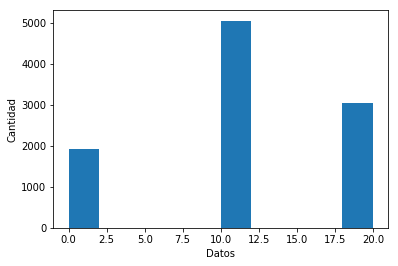

Entropía analítica:  1.48547529723
Entropía datos:  1.47636205963


In [10]:
elements = [0, 10, 20]
probabilities = [0.2, 0.5, 0.3]
datos = np.random.choice(elements, 10000, p=probabilities)

plt.hist(datos)
plt.xlabel('Datos')
plt.ylabel('Cantidad')
plt.show()

entropia_analitica=-0.2*np.log(0.2)/np.log(2)-0.5*np.log(0.5)/np.log(2)-0.3*np.log(0.3)/np.log(2)
entropia_datos=discrete_entropy_estimation(datos)

print('Entropía analítica: ', entropia_analitica)
print('Entropía datos: ', entropia_datos)

In [11]:
#distribucion conjunta
elements = [1, 2, 3, 4]
probabilities = [1/3, 1/3, 0, 1/3]
datos = np.random.choice(elements, 10000, p=probabilities)
x=[]
y=[]
for i in range(len(datos)):
    if datos[i]==1:
        x.append(0)
        y.append(0)
    elif datos[i]==2:
        x.append(0)
        y.append(1)
    elif datos[i]==3:
        x.append(1)
        y.append(0)
    else:
        x.append(1)
        y.append(1)
        
x=np.array(x)
y=np.array(y)
print(pd.crosstab(x,y))

print('\nEntropia H(x): ', discrete_entropy_estimation(x))
print('Entropia H(y): ', discrete_entropy_estimation(y))
print('Entropia conjunta H(x,y): ', discrete_entropy_estimation2(x,y))
print('Entropia condicional H(x|y): ', discrete_conditional_entropy(x,y))
print('Informacion mutua I(x;y): ', mutual_information(x, y))

col_0     0     1
row_0            
0      3428  3352
1         0  3220

Entropia H(x):  0.906543137903
Entropia H(y):  0.927472943722
Entropia conjunta H(x,y):  1.58448168377
Entropia condicional H(x|y):  0.657008740043
Informacion mutua I(x;y):  0.24953439786


### Discretización datos continuos

In [12]:
def discretize(x, bines = 10):
    #Discretization of continuous data
    labels = np.arange(0,bines)
    out = pd.cut(x, bines, labels = labels)
    return out

### Generación de datos continuos, estimación de entropía

Entropía datos continuos discretizados:  2.59940300145


C:\Users\mlva_\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


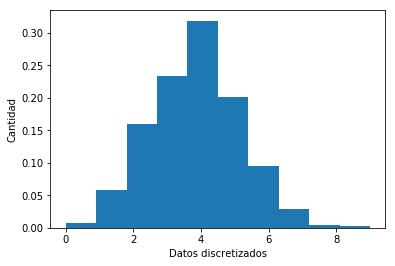

In [13]:
mu=1
sigma=2
x = np.random.normal(mu,sigma,1000)

x_discretized = discretize(x)
entropia_discretizados = discrete_entropy_estimation(x_discretized)
print('Entropía datos continuos discretizados: ', entropia_discretizados)

plt.hist(x_discretized, normed=True)
plt.xlabel('Datos discretizados')
plt.ylabel('Cantidad')
plt.show()

# Algoritmos de selección de características

In [14]:
# Paramenters
beta = 0.4

# minimal Redundance Maximal Relevance
def mRMR(relevance, redundance, complementarity, setSize):
  return relevance - (1.0 / setSize) * redundance

# Mutual Information Feature Selection
def MIFS(relevance, redundance, complementarity, setSize):
  global beta
  return relevance - beta * redundance

# Mutual Information Maximization (?)
def MIM(relevance, redundance, complementarity, setSize):
  return relevance

# Conditional Infomax Feature Extraction
def CIFE(relevance, redundance, complementarity, setSize):
  return relevance - redundance + complementarity

# Joint Mutual Information
def JMI(relevance, redundance, complementarity, setSize):
  return relevance - (1.0 / setSize) * redundance + (1.0 / setSize) * complementarity

def MIFSU():
  pass

def NMIFS():
  pass

def forward_feature_selection(discrete_data, target, n_features_selected, method):
  # Performs FFS algorithm given the data and it's labels, the number of desired
  # features and an optimization functional.
  # Input: discrete_data (data to be processed), target (data labels), 
  #        n_features_selected (number of features to select), 
  #        method (functional, may be mRMR, MIFS, MIFS-U, NMIFS, MIM, CIFE, JMI)
  # Output: X_selected (subsampled data using selected features), 
  #         S (set of selected features)
  
  # Rename data
  X = discrete_data
  y = target
  samples, dimentions = np.shape(X)
  
  # Initialization
  S = []
  F = list(range(dimentions))
  
  # First feature selection
  inf_1=np.zeros(dimentions)
  for i in range(len(F)):
    inf_1[i] = mutual_information(X[:,i], y)
    
  S.append(np.argmax(inf_1))
  F.remove(np.argmax(inf_1))
  
  # Mutual information matrix calculation I(fi;sj)
  matMI = np.zeros((dimentions, dimentions))
  for ix in range(dimentions):  
    for jx in range(ix,dimentions):
      matMI[ix,jx] = mutual_information(X[:,ix],X[:,jx])
  for ix in range(1, dimentions):
    for jx in range(0, ix):
      matMI[ix,jx] = matMI[jx,ix]
      
  # Conditional Mutual information matrix calculation I(fi;sj|C)
  if method in [mRMR, MIFS, MIM, CIFE, JMI]:
    matCMI = np.zeros((dimentions, dimentions))
    for ix in range(dimentions):  
      for jx in range(ix,dimentions):
        matCMI[ix,jx] = conditional_mutual_information(X[:,ix], X[:,jx], target)
    for ix in range(1, dimentions):
      for jx in range(0, ix):
        matCMI[ix,jx] = matCMI[jx,ix]

  # Normalized Mutual information matrix calculation NI(fi;fs)
  elif method in [NMIFS]:
    matNMI = np.zeros((dimentions, dimentions))
    for ix in range(dimentions):
      for jx in range(ix,dimentions):
        matNMI[ix,jx] = normalized_mutual_information(X[:,ix], X[:,jx])
    for ix in range(1, dimentions):
      for jx in range(0, ix):
        matNMI[ix,jx] = matNMI[jx,ix]
  
  # Candidate feature selection
  while len(S)<n_features_selected:
    setSize = len(S)
    G=np.zeros(len(F))
    for j in range(len(G)):
      if method in [mRMR, MIFS, MIM, CIFE, JMI]:
        sum_redundance=0
        sum_complementarity=0
        for k in range(len(S)):
            sum_redundance+=matMI[S[k],F[j]]
            sum_complementarity += matCMI[S[k],F[j]]
        G[j] = method(inf_1[F[j]], sum_redundance, sum_complementarity, setSize)
      elif method in [NMIFS]:
        sum_redundance=0
        for k in range(len(S)):
          sum_redundance+=matNMI[S[k],F[j]]
        G[j] = mRMR(inf_1[F[j]], sum_redundance, 0, setSize)
      elif method in [MIFSU]:
        sum_redundance=0
        for k in range(len(S)):
          H_fs = discrete_entropy_estimation(X[:,k])
          sum_redundance+=((matMI[S[k],F[j]] * inf_1[S[k]]) / H_fs)
        G[j] = MIFS(inf_1[F[j]], sum_redundance, 0, setSize)
        
        
    S.append(F[np.argmax(G)])
    F.remove(F[np.argmax(G)])
  
  # Optimal feature selection
  X_selected = np.zeros((samples, n_features_selected))
  for i in range(n_features_selected):
    X_selected[:,i]=X[:,S[i]]
  
  return X_selected, S

In [15]:
# Parameters
betaMIFS = 0.4
betaMIFSU = 0.4

def forward_feature_selection2(discrete_data, target, n_features_selected, method):
  # Performs FFS algorithm given the data and it's labels, the number of desired
  # features and an optimization functional.
  # Input: discrete_data (data to be processed), target (data labels), 
  #        n_features_selected (number of features to select), 
  #        method (name of functional, may be 'mRMR', 'MIFS', 'MIFS-U', 
  #                'NMIFS', 'MIM', 'CIFE', 'JMI')
  # Output: X_selected (subsampled data using selected features), 
  #         S (set of selected features)
  
  # Rename data
  X = discrete_data
  y = target
  samples, dimentions = np.shape(X)
  
  # Initialization
  S = []
  F = list(range(dimentions))
  
  # First feature selection
  relevances=np.zeros(dimentions)
  for i in range(len(F)):
    relevances[i] = mutual_information(X[:,i], y)
    
  S.append(np.argmax(relevances))
  F.remove(np.argmax(relevances))
  
  # Mutual information matrix calculation I(fi;sj)
  matMI = -1 * np.ones((dimentions, dimentions))
  
  # Conditional Mutual information matrix calculation I(fi;sj|C)
  matCMI = -1 * np.ones((dimentions, dimentions))
  
  # Normalized Mutual information matrix calculation NI(fi;fs)
  matNMI = -1 * np.ones((dimentions, dimentions))
  
  # Method Definitions:
  def mRMR(X, y, S, F, j):
    nonlocal relevances, matMI
    setSize = setSize = len(S)
    relevance = relevances[F[j]]
    redundance = 0
    for k in range(len(S)):
      if matMI[S[k], F[j]] < 0:
        matMI[S[k], F[j]] = mutual_information(X[:, S[k]], X[:, F[j]])
        matMI[F[j], S[k]] = matMI[S[k], F[j]]
      redundance += matMI[S[k], F[j]]
    return relevance - (1.0 / setSize) * redundance
  
  def MIFS(X, y, S, F, j):
    global betaMIFS
    nonlocal relevances, matMI
    setSize = setSize = len(S)
    relevance = relevances[F[j]]
    redundance = 0
    for k in range(len(S)):
      if matMI[S[k], F[j]] < 0:
        matMI[S[k], F[j]] = mutual_information(X[:, S[k]], X[:, F[j]])
        matMI[F[j], S[k]] = matMI[S[k], F[j]]
      redundance += matMI[S[k], F[j]]
    return relevance - betaMIFS * redundance
  
  def MIFSU(X, y, S, F, j):
    global betaMIFSU
    nonlocal relevances, matMI
    setSize = setSize = len(S)
    relevance = relevances[F[j]]
    redundance = 0
    for k in range(len(S)):
      if matMI[S[k], F[j]] < 0:
        matMI[S[k], F[j]] = mutual_information(X[:, S[k]], X[:, F[j]])
        matMI[F[j], S[k]] = matMI[S[k], F[j]]
      #redundance += matMI[S[k], F[j]]
      H_fs = discrete_entropy_estimation(X[:,k])
      redundance += ((matMI[S[k],F[j]] * relevances[S[k]]) / H_fs)
    return relevance - betaMIFSU * redundance
  
  def NMIFS(X, y, S, F, j):
    nonlocal relevances, matNMI
    setSize = setSize = len(S)
    relevance = relevances[F[j]]
    redundance = 0
    for k in range(len(S)):
      if matNMI[S[k], F[j]] < 0:
        matNMI[S[k], F[j]] = normalized_mutual_information(X[:, S[k]], X[:, F[j]])
        matNMI[F[j], S[k]] = matNMI[S[k], F[j]]
      redundance += matNMI[S[k], F[j]]
    return relevance - (1.0 / setSize) * redundance
  
  def MIM(X, y, S, F, j):
    nonlocal relevances
    relevance = relevances[F[j]]
    return relevance
  
  def CIFE(X, y, S, F, j):
    nonlocal relevances, matMI, matCMI
    relevance = relevances[F[j]]
    redundance = 0
    complementarity = 0
    for k in range(len(S)):
      if matMI[S[k], F[j]] < 0:
        matMI[S[k], F[j]] = mutual_information(X[:, S[k]], X[:, F[j]])
        matMI[F[j], S[k]] = matMI[S[k], F[j]]
      redundance += matMI[S[k], F[j]]
      if matCMI[S[k], F[j]] < 0:
        matCMI[S[k], F[j]] = conditional_mutual_information(X[:, S[k]], X[:, F[j]], y)
        matCMI[F[j], S[k]] = matCMI[S[k], F[j]]
      complementarity += matCMI[S[k],F[j]]
    return relevance - redundance + complementarity
  
  def JMI(X, y, S, F, j):
    nonlocal relevances, matMI, matCMI
    setSize = setSize = len(S)
    relevance = relevances[F[j]]
    redundance = 0
    complementarity = 0
    for k in range(len(S)):
      if matMI[S[k], F[j]] < 0:
        matMI[S[k], F[j]] = mutual_information(X[:, S[k]], X[:, F[j]])
        matMI[F[j], S[k]] = matMI[S[k], F[j]]
      redundance += matMI[S[k], F[j]]
      if matCMI[S[k], F[j]] < 0:
        matCMI[S[k], F[j]] = conditional_mutual_information(X[:, S[k]], X[:, F[j]], y)
        matCMI[F[j], S[k]] = matCMI[S[k], F[j]]
      complementarity += matCMI[S[k],F[j]]
    return relevance - (1.0 / setSize) * redundance + (1.0 / setSize) * complementarity
  
  available_methods = [mRMR, MIFS, MIFSU, NMIFS, MIM, CIFE, JMI]
  
  # Candidate feature selection
  while len(S)<n_features_selected:
    setSize = len(S)
    G=np.zeros(len(F))
    for j in range(len(G)):
      if method in [f.__name__ for f in available_methods]:
        index = [f.__name__ for f in available_methods].index(method)
        G[j] = available_methods[index](X, y, S, F, j)
    
    S.append(F[np.argmax(G)])
    F.remove(F[np.argmax(G)])
  
  # Optimal feature selection
  X_selected = np.zeros((samples, n_features_selected))
  for i in range(n_features_selected):
    X_selected[:,i]=X[:,S[i]]
  
  return X_selected, S

In [16]:
## Este bloque está para probar que los dos algoritmos de seleccion funcionen igual
## y para comparar los tiempos de ejecucion para un mismo metodo.
## Eso si, sirve para ver que hay metodos que calculando las matrices al vuelo o
## como haciamos antes el tiempo no cambia, que igual es curioso
## Lo ideal seria poner esto en otro lado para hacer comparaciones de tiempo

from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True)
samples, dimentions = np.shape(data)
discrete_data = np.zeros((samples, dimentions))
for i in range(dimentions):
    discrete_data[:,i] = discretize(data[:,i], bines = 10)
X = discrete_data
n_data, n_dimentions = np.shape(X)

from time import time

available_methods = [mRMR, MIFS, MIFSU, NMIFS, MIM, CIFE, JMI]

for method in available_methods:
  print('Método {}:'.format(method.__name__))
  ti1 = time()
  X_selected, S = forward_feature_selection(X, target, n_dimentions, method)
  print('Tiempo de ejecución con algoritmo original: {} [s]'.format(time() - ti1))
  ti2 = time()
  X_selected2, S2 = forward_feature_selection2(X, target, n_dimentions, method.__name__)
  print('Tiempo de ejecución con algoritmo modificado: {} [s]'.format(time() - ti2))

  print('Conjunto obtenido con  algoritmo original:\n{}'.format(S))
  print('Conjunto obtenido con  algoritmo modificado:\n{}'.format(S2))
  print('Son iguales: {}\n'.format(S == S2))

Método mRMR:
Tiempo de ejecución con algoritmo original: 23.312841176986694 [s]
Tiempo de ejecución con algoritmo modificado: 5.386473178863525 [s]
Conjunto obtenido con  algoritmo original:
[27, 21, 20, 10, 28, 7, 26, 13, 2, 24, 16, 23, 12, 1, 6, 22, 18, 25, 4, 3, 19, 11, 0, 17, 8, 5, 14, 29, 9, 15]
Conjunto obtenido con  algoritmo modificado:
[27, 21, 20, 10, 28, 7, 26, 13, 2, 24, 16, 23, 12, 1, 6, 22, 18, 25, 4, 3, 19, 11, 0, 17, 8, 5, 14, 29, 9, 15]
Son iguales: True

Método MIFS:
Tiempo de ejecución con algoritmo original: 19.85288643836975 [s]
Tiempo de ejecución con algoritmo modificado: 4.816157341003418 [s]
Conjunto obtenido con  algoritmo original:
[27, 20, 21, 16, 28, 10, 14, 4, 18, 19, 13, 11, 29, 1, 8, 12, 24, 17, 9, 3, 25, 15, 23, 26, 7, 0, 5, 6, 2, 22]
Conjunto obtenido con  algoritmo modificado:
[27, 20, 21, 16, 28, 10, 14, 4, 18, 19, 13, 11, 29, 1, 8, 12, 24, 17, 9, 3, 25, 15, 23, 26, 7, 0, 5, 6, 2, 22]
Son iguales: True

Método MIFSU:
Tiempo de ejecución con algoritmo

# Prueba con dataset reales

## Wine Dataset

Inicio selección de features: 
mRMR :
Score selección características ( 1 ): 0.686257854493
Score selección características ( 2 ): 0.900079995962
Score selección características ( 3 ): 0.928325384208
Score selección características ( 4 ): 0.950115073056
Score selección características ( 5 ): 0.977769197769
Score selección características ( 6 ): 0.956147576148
Score selección características ( 7 ): 0.972513942514
Score selección características ( 8 ): 0.977751280692
Score selección características ( 9 ): 0.972363792364
Score selección características ( 10 ): 0.977919347919
Score selección características ( 11 ): 0.983633633634
Score selección características ( 12 ): 0.967117117117
Score selección características ( 13 ): 0.961402831403
Selected features:
[6, 0, 10, 12, 9, 11, 4, 1, 5, 3, 8, 2, 7]

MIFS :
Score selección características ( 1 ): 0.697527695763
Score selección características ( 2 ): 0.900565523507
Score selección características ( 3 ): 0.950441870442
Score selección caracter

Text(0,0.5,'Accuracy de validacion cruzada')

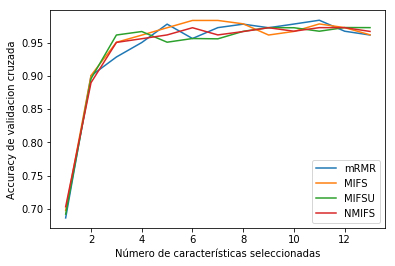

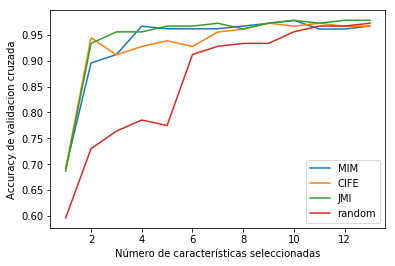

In [17]:
import random
from sklearn.datasets import load_wine
data, target = load_wine(return_X_y=True)
samples, dimentions = np.shape(data)
discrete_data = np.zeros((samples, dimentions))
for i in range(dimentions):
  discrete_data[:,i] = discretize(data[:,i], bines = 10)
X = discrete_data
n_data, n_dimentions = np.shape(X)

clf = RandomForestClassifier(n_estimators=150)


print('Inicio selección de features: ')
methods = ['mRMR', 'MIFS', 'MIFSU', 'NMIFS', 'MIM', 'CIFE', 'JMI','random']
score = np.zeros((n_dimentions,len(methods)))
n_caracteristicas = np.arange(1,n_dimentions+1)
selected_features = np.zeros((n_dimentions,len(methods)))

j=0
for method in methods:
  print(method,':')
  if method != 'random':
    X_selected2, S = forward_feature_selection2(X, target, n_dimentions, method)
  else:
    S = np.arange(0,n_dimentions)
    random.shuffle(S)

  for i in range(len(S)):
    #print(S[0:i+1])
    X_selected = X[:,S[0:i+1]]
    X_selected_c = data[:,S[0:i+1]]
    scores = cross_val_score(clf, X_selected_c, target, cv=5)
    score[i,j]=np.mean(scores)
    print('Score selección características (',i+1,'):', np.mean(scores))
  selected_features[:,j]=S
  print('Selected features:\n{}\n'.format(S))
  j+=1

print('Término selección de features.')

plt.figure()
plt.plot(n_caracteristicas, score[:,0],label='mRMR')
plt.plot(n_caracteristicas, score[:,1],label='MIFS')
plt.plot(n_caracteristicas, score[:,2],label='MIFSU')
plt.plot(n_caracteristicas, score[:,3],label='NMIFS')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Accuracy de validacion cruzada')

plt.figure()
plt.plot(n_caracteristicas, score[:,4],label='MIM')
plt.plot(n_caracteristicas, score[:,5],label='CIFE')
plt.plot(n_caracteristicas, score[:,6],label='JMI')
plt.plot(n_caracteristicas, score[:,7],label='random')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Accuracy de validacion cruzada')

mRMR :
number of selected features:  1
Tiempo [s]:  0.12962794303894043
number of selected features:  2
Tiempo [s]:  0.2642953395843506
number of selected features:  3
Tiempo [s]:  0.3695847988128662
number of selected features:  4
Tiempo [s]:  0.523038387298584
number of selected features:  5
Tiempo [s]:  0.6418230533599854
number of selected features:  6
Tiempo [s]:  0.9605879783630371
number of selected features:  7
Tiempo [s]:  0.7679519653320312
number of selected features:  8
Tiempo [s]:  0.8295183181762695
number of selected features:  9
Tiempo [s]:  0.8444173336029053
number of selected features:  10
Tiempo [s]:  0.8868780136108398
number of selected features:  11
Tiempo [s]:  0.9779763221740723
number of selected features:  12
Tiempo [s]:  1.155503511428833
number of selected features:  13
Tiempo [s]:  0.9474930763244629
Selected features:  [6, 0, 10, 12, 9, 11, 4, 1, 5, 3, 8, 2, 7]
MIFS :
number of selected features:  1
Tiempo [s]:  0.12366938591003418
number of selected feat

Text(0,0.5,'Tiempo de selección [s]')

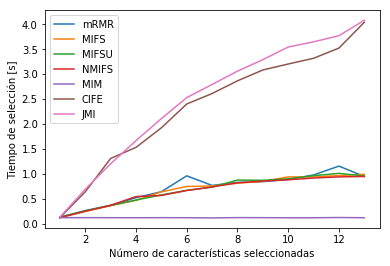

In [18]:
#Tiempo de seleccion sobre k
from time import time
tiempo_total = np.zeros((n_dimentions,len(methods)))

j=0
for method in methods:
  print(method,':')

  for i in range(n_dimentions):
    print('number of selected features: ',i+1)
    time_a = time()
    X_selected2, S = forward_feature_selection2(X, target, i+1, method)
    tiempo = (time() - time_a)
    print('Tiempo [s]: ',tiempo)
    tiempo_total[i,j]=tiempo
  print('Selected features: ',S)
  j+=1
    
plt.figure()
plt.plot(n_caracteristicas, tiempo_total[:,0],label='mRMR')
plt.plot(n_caracteristicas, tiempo_total[:,1],label='MIFS')
plt.plot(n_caracteristicas, tiempo_total[:,2],label='MIFSU')
plt.plot(n_caracteristicas, tiempo_total[:,3],label='NMIFS')
plt.plot(n_caracteristicas, tiempo_total[:,4],label='MIM')
plt.plot(n_caracteristicas, tiempo_total[:,5],label='CIFE')
plt.plot(n_caracteristicas, tiempo_total[:,6],label='JMI')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Tiempo de selección [s]')

mRMR (|S| = 3):
Initial feature set size: 13
Tiempo [s]: 0.3616492748260498
Initial feature set size: 12
Tiempo [s]: 0.3301253318786621
Initial feature set size: 11
Tiempo [s]: 0.29317808151245117
Initial feature set size: 10
Tiempo [s]: 0.26081085205078125
Selected features:
[6, 0, 4]

MIFS (|S| = 3):
Initial feature set size: 13
Tiempo [s]: 0.3575575351715088
Initial feature set size: 12
Tiempo [s]: 0.3442983627319336
Initial feature set size: 11
Tiempo [s]: 0.29122161865234375
Initial feature set size: 10
Tiempo [s]: 0.26326608657836914
Selected features:
[6, 0, 1]

MIFSU (|S| = 3):
Initial feature set size: 13
Tiempo [s]: 0.35841798782348633
Initial feature set size: 12
Tiempo [s]: 0.3235049247741699
Initial feature set size: 11
Tiempo [s]: 0.3001890182495117
Initial feature set size: 10
Tiempo [s]: 0.2653226852416992
Selected features:
[6, 0, 5]

NMIFS (|S| = 3):
Initial feature set size: 13
Tiempo [s]: 0.35801243782043457
Initial feature set size: 12
Tiempo [s]: 0.329193115234375

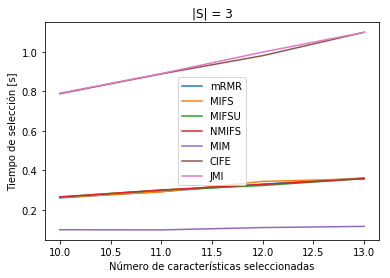

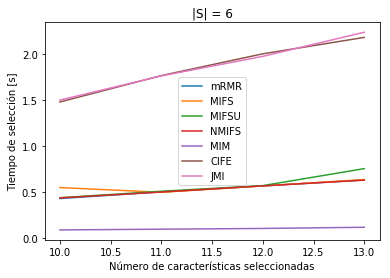

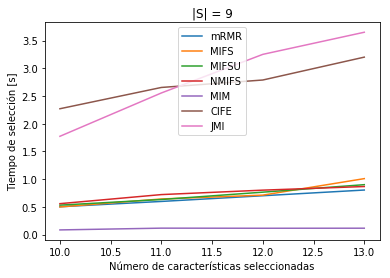

In [19]:
#Tiempo de selección sobre |F|
try:
  methods.pop(methods.index('random'))
except Exception:
  pass
K = [3, 6, 9]
for k in K:
  subsampling = list(range(dimentions, K[2], -1))
  tiempo_total = np.zeros((len(subsampling), len(methods)))
  j = 0
  for method in methods:
    print('{} (|S| = {}):'.format(method, k))
    for size in subsampling:
      print('Initial feature set size: {}'.format(size))
      time_a = time()
      X_selected2, S = forward_feature_selection2(X[:,0:(size-1)], target, k, method)
      tiempo = (time()- time_a)
      print('Tiempo [s]: {}'.format(tiempo))
      tiempo_total[subsampling.index(size), j] = tiempo
    print('Selected features:\n{}\n'.format(S))
    j += 1
  tiempo_total = tiempo_total[::-1,:]
  plt.figure()
  plt.plot(subsampling[::-1], tiempo_total[:,0],label='mRMR')
  plt.plot(subsampling[::-1], tiempo_total[:,1],label='MIFS')
  plt.plot(subsampling[::-1], tiempo_total[:,2],label='MIFSU')
  plt.plot(subsampling[::-1], tiempo_total[:,3],label='NMIFS')
  plt.plot(subsampling[::-1], tiempo_total[:,4],label='MIM')
  plt.plot(subsampling[::-1], tiempo_total[:,5],label='CIFE')
  plt.plot(subsampling[::-1], tiempo_total[:,6],label='JMI')
  plt.legend()
  plt.title('|S| = {}'.format(k))
  plt.xlabel('Número de características seleccionadas')
  plt.ylabel('Tiempo de selección [s]')

## Breast cancer dataset

Inicio selección de features: 
mRMR :
Score selección características ( 1 ): 0.917522123894
Score selección características ( 2 ): 0.890973451327
Score selección características ( 3 ): 0.952550981147
Score selección características ( 4 ): 0.959630627164
Score selección características ( 5 ): 0.956152366295
Score selección características ( 6 ): 0.950904193921
Score selección características ( 7 ): 0.956183147364
Score selección características ( 8 ): 0.952674105425
Score selección características ( 9 ): 0.95441323586
Score selección características ( 10 ): 0.959661408234
Score selección características ( 11 ): 0.964940361678
Score selección características ( 12 ): 0.95789149673
Score selección características ( 13 ): 0.957922277799
Score selección características ( 14 ): 0.95789149673
Score selección características ( 15 ): 0.95782993459
Score selección características ( 16 ): 0.95782993459
Score selección características ( 17 ): 0.95441323586
Score selección características ( 18 ): 0.

Score selección características ( 21 ): 0.963201231243
Score selección características ( 22 ): 0.961462100808
Score selección características ( 23 ): 0.961462100808
Score selección características ( 24 ): 0.95786071566
Score selección características ( 25 ): 0.961462100808
Score selección características ( 26 ): 0.961431319738
Score selección características ( 27 ): 0.957922277799
Score selección características ( 28 ): 0.959692189304
Score selección características ( 29 ): 0.95789149673
Score selección características ( 30 ): 0.956152366295
Selected features:
[27, 22, 7, 20, 23, 2, 0, 6, 3, 26, 10, 5, 12, 25, 13, 21, 1, 17, 24, 28, 4, 15, 8, 29, 16, 18, 19, 9, 14, 11]

CIFE :
Score selección características ( 1 ): 0.917522123894
Score selección características ( 2 ): 0.942023855329
Score selección características ( 3 ): 0.928018468642
Score selección características ( 4 ): 0.926217776068
Score selección características ( 5 ): 0.931465948442
Score selección características ( 6 ): 0.936

Text(0,0.5,'Accuracy de validacion cruzada')

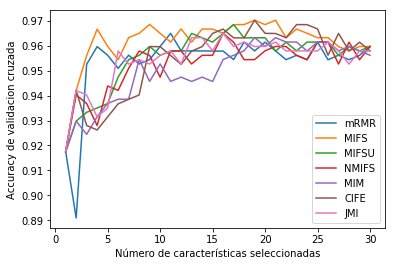

In [20]:
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True)
samples, dimentions = np.shape(data)
discrete_data = np.zeros((samples, dimentions))
for i in range(dimentions):
    discrete_data[:,i] = discretize(data[:,i], bines = 10)
X = discrete_data
n_data, n_dimentions = np.shape(X)

clf = RandomForestClassifier(n_estimators=150)


print('Inicio selección de features: ')
methods = ['mRMR', 'MIFS', 'MIFSU', 'NMIFS', 'MIM', 'CIFE', 'JMI']
score = np.zeros((n_dimentions,len(methods)))
n_caracteristicas = np.arange(1,n_dimentions+1)
selected_features = np.zeros((n_dimentions,len(methods)))

j=0
for method in methods:
    print(method,':')
    X_selected2, S = forward_feature_selection2(X, target, n_dimentions, method)
    for i in range(len(S)):
        #print(S[0:i+1])
        X_selected = X[:,S[0:i+1]]
        scores = cross_val_score(clf, X_selected, target, cv=5)
        score[i,j]=np.mean(scores)
        print('Score selección características (',i+1,'):', np.mean(scores))
    selected_features[:,j]=S
    print('Selected features:\n{}\n'.format(S))
    j+=1

print('Término selección de features.')

plt.figure()
plt.plot(n_caracteristicas, score[:,0],label='mRMR')
plt.plot(n_caracteristicas, score[:,1],label='MIFS')
plt.plot(n_caracteristicas, score[:,2],label='MIFSU')
plt.plot(n_caracteristicas, score[:,3],label='NMIFS')
plt.plot(n_caracteristicas, score[:,4],label='MIM')
plt.plot(n_caracteristicas, score[:,5],label='CIFE')
plt.plot(n_caracteristicas, score[:,6],label='JMI')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Accuracy de validacion cruzada')

In [27]:
#Tiempo de seleccion sobre k
from time import time
tiempo_total = np.zeros((n_dimentions,len(methods)))

j=0
for method in methods:
  print(method,':')

  for i in range(n_dimentions):
    print('number of selected features: ',i+1)
    time_a = time()
    X_selected2, S = forward_feature_selection2(X, target, i+1, method)
    tiempo = (time() - time_a)
    print('Tiempo [s]: ',tiempo)
    tiempo_total[i,j]=tiempo
  print('Selected features: ',S)
  j+=1
    
plt.figure()
plt.plot(n_caracteristicas, tiempo_total[:,0],label='mRMR')
plt.plot(n_caracteristicas, tiempo_total[:,1],label='MIFS')
plt.plot(n_caracteristicas, tiempo_total[:,2],label='MIFSU')
plt.plot(n_caracteristicas, tiempo_total[:,3],label='NMIFS')
plt.plot(n_caracteristicas, tiempo_total[:,4],label='MIM')
plt.plot(n_caracteristicas, tiempo_total[:,5],label='CIFE')
plt.plot(n_caracteristicas, tiempo_total[:,6],label='JMI')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Tiempo de selección [s]')

mRMR :
number of selected features:  1
Tiempo [s]:  65.10909843444824
number of selected features:  2
Tiempo [s]:  132.1298418045044
number of selected features:  3
Tiempo [s]:  199.4350082874298
number of selected features:  4
Tiempo [s]:  269.20324182510376
number of selected features:  5
Tiempo [s]:  342.7093060016632
number of selected features:  6
Tiempo [s]:  408.4979372024536
number of selected features:  7
Tiempo [s]:  475.0998468399048
number of selected features:  8
Tiempo [s]:  547.0285720825195
number of selected features:  9
Tiempo [s]:  616.9000098705292
number of selected features:  10
Tiempo [s]:  704.4293451309204
number of selected features:  11
Tiempo [s]:  1087.4882216453552
number of selected features:  12
Tiempo [s]:  8239.089767694473
number of selected features:  13


ValueError: codes need to be convertible to an arrays of integers

mRMR (|S| = 10):
Initial feature set size: 30
Tiempo [s]: 2.923953056335449
Initial feature set size: 29
Tiempo [s]: 2.9128332138061523
Initial feature set size: 28
Tiempo [s]: 2.8419055938720703
Initial feature set size: 27
Tiempo [s]: 2.6013197898864746
Initial feature set size: 26
Tiempo [s]: 2.5270144939422607
Initial feature set size: 25
Tiempo [s]: 2.332648277282715
Initial feature set size: 24
Tiempo [s]: 2.207376718521118
Initial feature set size: 23
Tiempo [s]: 2.0842654705047607
Initial feature set size: 22
Tiempo [s]: 2.0369536876678467
Initial feature set size: 21
Tiempo [s]: 1.837069034576416
Selected features:
[7, 1, 0, 10, 16, 4, 6, 13, 3, 18]

MIFS (|S| = 10):
Initial feature set size: 30
Tiempo [s]: 3.0215847492218018
Initial feature set size: 29
Tiempo [s]: 2.746758222579956
Initial feature set size: 28
Tiempo [s]: 2.751781463623047
Initial feature set size: 27
Tiempo [s]: 2.6487205028533936
Initial feature set size: 26
Tiempo [s]: 2.476330280303955
Initial feature se

Tiempo [s]: 12.9857177734375
Initial feature set size: 28
Tiempo [s]: 12.695515632629395
Initial feature set size: 27
Tiempo [s]: 12.369082689285278
Initial feature set size: 26
Tiempo [s]: 12.53309965133667
Initial feature set size: 25
Tiempo [s]: 11.444305181503296
Initial feature set size: 24
Tiempo [s]: 10.794929504394531
Initial feature set size: 23
Tiempo [s]: 10.022881746292114
Initial feature set size: 22
Tiempo [s]: 9.257391929626465
Initial feature set size: 21
Tiempo [s]: 8.945229530334473
Selected features:
[7, 1, 9, 5, 18, 15, 14, 11, 8, 19, 4, 16, 17, 6, 10]

JMI (|S| = 15):
Initial feature set size: 30
Tiempo [s]: 14.170716047286987
Initial feature set size: 29
Tiempo [s]: 14.531988859176636
Initial feature set size: 28
Tiempo [s]: 14.695353746414185
Initial feature set size: 27
Tiempo [s]: 17.15673017501831
Initial feature set size: 26
Tiempo [s]: 15.63991403579712
Initial feature set size: 25
Tiempo [s]: 12.100776672363281
Initial feature set size: 24
Tiempo [s]: 11.47

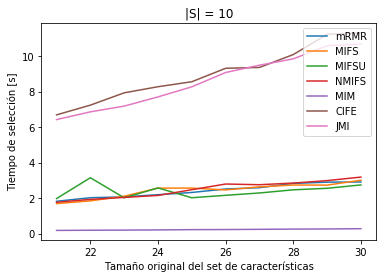

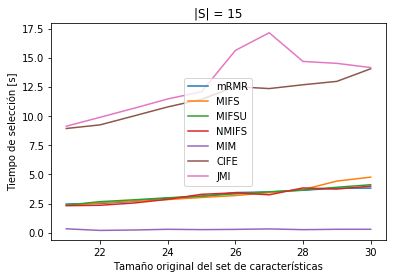

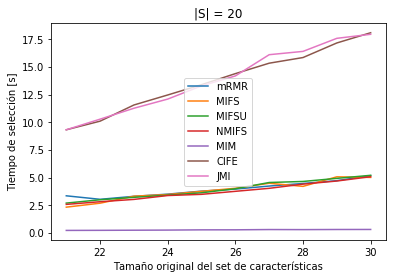

In [22]:
#Tiempo de selección sobre |F|
try:
  methods.pop(methods.index('random'))
except Exception:
  pass
K = [10, 15, 20]
for k in K:
  subsampling = list(range(dimentions, K[2], -1))
  tiempo_total = np.zeros((len(subsampling), len(methods)))
  j = 0
  for method in methods:
    print('{} (|S| = {}):'.format(method, k))
    for size in subsampling:
      print('Initial feature set size: {}'.format(size))
      time_a = time()
      X_selected2, S = forward_feature_selection2(X[:,0:(size-1)], target, k, method)
      tiempo = (time()- time_a)
      print('Tiempo [s]: {}'.format(tiempo))
      tiempo_total[subsampling.index(size), j] = tiempo
    print('Selected features:\n{}\n'.format(S))
    j += 1
  tiempo_total = tiempo_total[::-1,:]
  plt.figure()
  plt.plot(subsampling[::-1], tiempo_total[:,0],label='mRMR')
  plt.plot(subsampling[::-1], tiempo_total[:,1],label='MIFS')
  plt.plot(subsampling[::-1], tiempo_total[:,2],label='MIFSU')
  plt.plot(subsampling[::-1], tiempo_total[:,3],label='NMIFS')
  plt.plot(subsampling[::-1], tiempo_total[:,4],label='MIM')
  plt.plot(subsampling[::-1], tiempo_total[:,5],label='CIFE')
  plt.plot(subsampling[::-1], tiempo_total[:,6],label='JMI')
  plt.legend()
  plt.title('|S| = {}'.format(k))
  plt.xlabel('Tamaño original del set de características')
  plt.ylabel('Tiempo de selección [s]')

For mRMR method the optimal chosen feature set is:
[27, 21, 20, 10, 28, 7, 26, 13, 2, 24, 16]

For MIFS method the optimal chosen feature set is:
[27, 20, 21, 16, 28, 10, 14, 4, 18, 19, 13, 11, 29, 1, 8, 12, 24, 17, 9]

For MIFSU method the optimal chosen feature set is:
[27, 22, 7, 20, 26, 10, 21, 12, 1, 6, 28, 13, 24, 18, 16, 3, 19]

For NMIFS method the optimal chosen feature set is:
[27, 20, 7, 22, 26, 2, 6, 21, 0, 23, 5, 3, 25, 1, 10, 24]

For MIM method the optimal chosen feature set is:
[27, 22, 7, 20, 23, 2, 0, 6, 3, 26, 10, 5, 12, 25, 13, 21, 1, 17, 24]

For CIFE method the optimal chosen feature set is:
[27, 20, 9, 29, 14, 24, 11, 18, 1, 15, 8, 19, 4, 21, 16, 17, 28, 5, 10]

For JMI method the optimal chosen feature set is:
[27, 20, 26, 22, 7, 21, 2, 23, 6, 0, 24, 3, 25, 10, 5, 1]



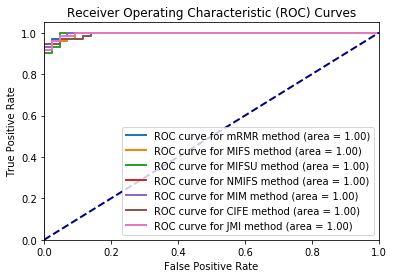

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

clf2 = SVC(kernel = 'rbf')

score_T = score.transpose()
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure()
for method in range(0, score_T.shape[0]):
  current_max_value = np.max(score_T[method,:])
  index = np.min(np.where(score_T[method,:] == current_max_value))
  X_selected2, S = forward_feature_selection2(X, target, int(index + 1), methods[method])
  print('For {} method the optimal chosen feature set is:\n{}\n'.format(methods[method], S))
  for i in range(len(S)):
    X_selected = X[:,S[0:i+1]]
  X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size = 0.2, random_state = 42)
  svm_score = clf2.fit(X_train, y_train).decision_function(X_test)
  fpr[methods[method]], tpr[methods[method]], _ = roc_curve(y_test, svm_score)
  roc_auc[methods[method]] = auc(fpr[methods[method]], tpr[methods[method]])
  lw = 2
  plt.plot(fpr[methods[method]], tpr[methods[method]], lw=lw, label='ROC curve for {0:s} method (area = {1:.2f})'.format(methods[method], float(roc_auc[methods[method]])))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## Forest Cover Type dataset

In [24]:
if False:
  from sklearn.datasets import fetch_covtype
  import tempfile
  test_data_home_forest = tempfile.mkdtemp()
  dataset = fetch_covtype(data_home=test_data_home_forest) ## 11MB
  data = dataset.data
  target = dataset.target
  samples, dimentions = np.shape(data)
  discrete_data = np.zeros((samples, dimentions))
  for i in range(dimentions):
      discrete_data[:,i] = discretize(data[:,i], bines = 10)
  X = discrete_data
  n_data, n_dimentions = np.shape(X)

  from time import time

  available_methods = ['mRMR', 'MIFS', 'MIFSU', 'NMIFS', 'MIM', 'CIFE', 'JMI']

  for method in available_methods:
    print('Método {}:'.format(method))
    ti = time()
    X_selected, S = forward_feature_selection2(X, target, n_dimentions, method)
    print('Tiempo de ejecución: {} [s]'.format(time() - ti))

    print('Conjunto obtenido:\n{}'.format(S))

## Leukemia dataset

In [25]:
## Dataset (demasiado) gigante con 72 ejemplos y 7000 features 

from sklearn.datasets.mldata import fetch_mldata
import tempfile
test_data_home_leuk = tempfile.mkdtemp()
leuk = fetch_mldata('leukemia', transpose_data=True, data_home=test_data_home_leuk)
target = leuk['target']
data = leuk['data']
samples, dimentions = np.shape(data)
discrete_data = np.zeros((samples, dimentions))
for i in range(dimentions):
    discrete_data[:,i] = discretize(data[:,i], bines = 10)
X = discrete_data
n_data, n_dimentions = np.shape(X)

n_dimentions = 20
methods = ['mRMR', 'MIFS', 'MIFSU', 'NMIFS', 'MIM', 'CIFE', 'JMI','random']
#methods = ['MIM']
score = np.zeros((n_dimentions,len(methods)))
n_caracteristicas = np.arange(1,n_dimentions+1)
selected_features = np.zeros((n_dimentions,len(methods)))

j=0
for method in methods:
    print(method,':')
    if method != 'random':
        X_selected2, S = forward_feature_selection2(X, target, n_dimentions, method)
    else:
        S = np.arange(0,n_dimentions)
        random.shuffle(S)
        
    for i in range(len(S)):
        #print(S[0:i+1])
        X_selected = X[:,S[0:i+1]]
        clf = RandomForestClassifier(n_estimators=150)
        scores = cross_val_score(clf, X_selected, target, cv=5)
        score[i,j]=np.mean(scores)
        print('Score selección características (',i+1,'):', np.mean(scores))
    selected_features[:,j]=S
    print('Selected features:\n{}\n'.format(S))
    j+=1

print('Término selección de features.')

plt.figure()
plt.plot(n_caracteristicas, score[:,0],label='mRMR')
plt.plot(n_caracteristicas, score[:,1],label='MIFS')
plt.plot(n_caracteristicas, score[:,2],label='MIFSU')
plt.plot(n_caracteristicas, score[:,3],label='NMIFS')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Accuracy de validacion cruzada')

plt.figure()
plt.plot(n_caracteristicas, score[:,4],label='MIM')
plt.plot(n_caracteristicas, score[:,5],label='CIFE')
plt.plot(n_caracteristicas, score[:,6],label='JMI')
plt.plot(n_caracteristicas, score[:,7],label='random')
plt.legend()
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Accuracy de validacion cruzada')

mRMR :
Score selección características ( 1 ): 0.944761904762
Score selección características ( 2 ): 0.944761904762
Score selección características ( 3 ): 1.0
Score selección características ( 4 ): 1.0
Score selección características ( 5 ): 0.986666666667
Score selección características ( 6 ): 1.0
Score selección características ( 7 ): 1.0
Score selección características ( 8 ): 1.0
Score selección características ( 9 ): 0.986666666667
Score selección características ( 10 ): 1.0
Score selección características ( 11 ): 1.0
Score selección características ( 12 ): 0.971428571429
Score selección características ( 13 ): 0.971428571429
Score selección características ( 14 ): 0.971428571429
Score selección características ( 15 ): 0.972380952381
Score selección características ( 16 ): 0.972380952381
Score selección características ( 17 ): 0.972380952381
Score selección características ( 18 ): 0.958095238095
Score selección características ( 19 ): 0.972380952381
Score selección características ( 

KeyboardInterrupt: 